### Lab-3 : Self-Practice

#### In this week, your self-practice task will consist to analyze the impact of class imballance on the performance of the logistic regression model.

#### Class imbalance is very common in real life. For example, in a classification problem to predict whether a person has a certain very rare disease, the dataset will always contain more negative samples than positive ones. This situation can have a significant impact on the performance of the model. You will analyze this situation in the case of the Titanic dataset used in the lab.

### 1. Load the titanic dataset and <b>PLOT</b> the proportion of positive and negative samples (survived vs non survived)

      survived  pclass     sex    age  sibsp  parch      fare embarked
0            1       1  female  29.00      0      0  211.3375        S
1            1       1    male   0.92      1      2  151.5500        S
2            0       1  female   2.00      1      2  151.5500        S
3            0       1    male  30.00      1      2  151.5500        S
4            0       1  female  25.00      1      2  151.5500        S
...        ...     ...     ...    ...    ...    ...       ...      ...
1304         0       3  female  14.50      1      0   14.4542        C
1305         0       3  female    NaN      1      0   14.4542        C
1306         0       3    male  26.50      0      0    7.2250        C
1307         0       3    male  27.00      0      0    7.2250        C
1308         0       3    male  29.00      0      0    7.8750        S

[1309 rows x 8 columns]


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


<AxesSubplot: >

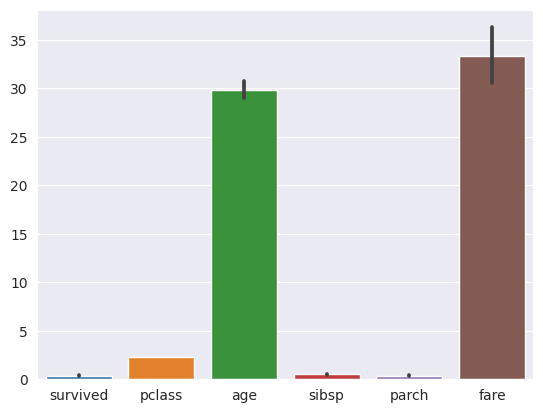

In [76]:
### write your code here. Load the dataset and plot (barplot) proportion of each class
import pandas as pd
import seaborn
titanic_data = pd.read_csv('titanic.csv')
titanic_data.shape
titanic_data = titanic_data.drop(['name'], axis = 1)
print(titanic_data)
seaborn.barplot(titanic_data)

In [77]:

X, y = titanic_data.loc[:, 'pclass':], titanic_data.loc[:, 'survived']


% of positive samples in whole data: 38.19709702062643
% of positive samples in train set: 38.2043935052531
% of positive samples in test set: 38.16793893129771


#### Preprocess the data as it has been done in the lab, feel free to adapt

In [78]:
#### preprocess the data
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

# imputing missing values
imputer = SimpleImputer(strategy='most_frequent')
imputer.fit(X)
X = pd.DataFrame(imputer.transform(X), columns=X.columns)


# one-hot-encode categorical features
def ohe_new_features(df, features_name, encoder):
    new_feats = encoder.transform(df[features_name])
    # create dataframe from encoded features with named columns
    new_cols = pd.DataFrame(new_feats, dtype=int, columns=encoder.get_feature_names(features_name))
    new_df = pd.concat([df, new_cols], axis=1)
    new_df.drop(features_name, axis=1, inplace=True)
    return new_df

encoder = OneHotEncoder(sparse=False, drop='first')
f_names = ['sex', 'embarked']
encoder.fit(X[f_names])
X = ohe_new_features(X, f_names, encoder)


# feature scaling
scaler = MinMaxScaler()
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X), columns=X.columns)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


## 2. Impact of class imballance. 
##### Now, you will `artificially` imbalance the dataset. From the original dataset, create different dataset with the following class representations (drop samples from one class): 
##### 1. 20% vs 80%
##### 2. 30% vs 70%
##### 3. 40% vs 60%

## Split each data into train and test set as in the lab; train logistic regression model for each setting and report (PLOT) the accuracy, precision, and recall of each model

In [81]:
### write your code here


,pclass,age,sibsp,parch,fare,sex_male,embarked_Q,embarked_S
0,1.0,0.210823,0.000,0.000000,0.015412,1.0,0.0,1.0
1,0.0,0.436302,0.000,0.000000,0.264739,0.0,0.0,1.0
2,1.0,0.336089,0.000,0.000000,0.016908,1.0,0.0,1.0
3,0.5,0.624201,0.000,0.000000,0.025374,1.0,0.0,1.0
4,0.0,0.298509,0.125,0.000000,0.101497,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
1042,0.5,0.373669,0.000,0.000000,0.025374,0.0,0.0,1.0
1043,1.0,0.311036,0.125,0.000000,0.015469,0.0,0.0,1.0
1044,0.0,0.298509,0.000,0.000000,0.000000,1.0,0.0,1.0
1045,0.0,0.298509,0.000,0.000000,0.051822,1.0,0.0,1.0


## 3. Analyse the class-wise accuracy. 
#### For each model, plot (bar plots) the class-wise accuracy, i.e., the accuracy for each class.

In [80]:
#### write your code 

## 4. Report 
### Write a small report (few sentences) to discuss from your analysis, the impact of class imballance on logistic model's performance 

`Write your report here`